<a href="https://colab.research.google.com/github/drewm8080/Analyzing-COVID-19-Data/blob/main/COVID_19_Projections_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**User Input Here**

In [31]:
print('Welcome to the COVID-19_Projections Statistics')
print('')
print('Please tell me which state you would like to see. No spaces,acronoym only and all caps. Example: FL for Florida and AL for Alabama')
userinput = input('Please put state here:')

Welcome to the COVID-19_Projections Statistics

Please tell me which state you would like to see. No spaces,acronoym only and all caps. Example: FL for Florida and AL for Alabama
Please put state here:CA


**Framework for Cases and Deaths from Covid_Projections**



In [32]:
# Might need this cell if your data does not download directly from the URL
# !pip install fsspec
# !pip install pandas

In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [34]:
# grabbing the Data
url = 'https://github.com/youyanggu/covid19-infection-estimates-latest/raw/main/latest_all_estimates_states.csv'
df = pd.read_csv(url)

In [35]:
# indexing the data
df = df.loc[:,['date','state','total_deaths','total_infected_mean']]


In [36]:
# converting to datetime 
df['date'] = pd.to_datetime(df['date'])

In [37]:
# renaming the columns
df['Deaths'] = df['total_deaths']
df['Cases'] = df['total_infected_mean']
df = df.drop(columns=['total_deaths','total_infected_mean'])

In [38]:
# making sure the data starts March 1st 
df = df[df['date'] >= '03-01-2020']


In [39]:
# dropping Null Values
df = df.dropna()

In [40]:
# creating the day column
df['Day'] = df.groupby('state')['date'].rank(ascending=True)

In [41]:
df['Avg day of case'] = 0 # declaring new column
df['Avg day of death'] = 0

In [42]:
# setting the avg day of case to be the first day of the day column
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of case'] = df.loc[:,'Day']

In [43]:
# getting user input
df = df[df['state'] == userinput]

In [44]:
# making sure it only calculate where the deaths >0
df = df[df['Deaths'] > 0]

In [45]:
# creating a new column
df['Avg day of death'] = 0

In [46]:
# setting the first day as the first row in Avg day of death
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of death'] = df.loc[:,'Day']

In [47]:
# creating the CDF Column
df['cdf_cases'] = df['Cases']

In [48]:
# creating the cdf column
df['cdf_deaths'] = df['Deaths']

In [49]:
# creating the formula for the CDF column
df.loc[:,'cdf_cases':] = df.loc[:,'cdf_cases':].div(df.iloc[-1]['cdf_cases':])
df = df.reset_index()

In [50]:
# creating the formula for the CDF column
df['cdf_deaths'] = df.loc[:,'cdf_deaths':].div(df.iloc[-1]['cdf_deaths':])

In [51]:
# calulating Avgerage day of case
for i in range(1, len(df)):
  x = (((df.loc[i, 'Cases'] - df.loc[i-1, 'Cases']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of case'])) / (df.loc[i, 'Cases'])) + (df.loc[i-1, 'Avg day of case'])
  df.loc[i, 'Avg day of case'] = round(x, 2)


In [52]:
# calulating Avgerage day of death
for i in range(1, len(df)):
  x = (((df.loc[i, 'Deaths'] - df.loc[i-1, 'Deaths']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of death'])) / (df.loc[i, 'Deaths'])) + (df.loc[i-1, 'Avg day of death'])
  df.loc[i, 'Avg day of death'] = round(x, 2)

In [53]:
# dropping null values for deaths
df = df.dropna()

In [54]:
# avg death day - avg case day
df['Avg Death Day - Avg Case Day'] = df['Avg day of death'] - df['Avg day of case'] 

In [55]:
# avg day of case/ current day
df['Avg Day of Case/ Current Day'] = df['Avg day of case'] / df['Day']

In [56]:
# avg death day/current day
df['Avg Day of Death/ Current Day'] = df['Avg day of death'] / df['Day']

In [57]:
# converting to datetime
df.date = pd.to_datetime(df.date)

**Framework for hospital data**

In [58]:
# loading in the data

hospitalizationdf = pd.read_csv('https://healthdata.gov/api/views/g62h-syeh/rows.csv?accessType=DOWNLOAD')

In [59]:
# slicing the df
hospitalizationdf = hospitalizationdf.loc[:,['state','date','previous_day_admission_adult_covid_confirmed','previous_day_admission_adult_covid_suspected','previous_day_admission_pediatric_covid_confirmed','previous_day_admission_pediatric_covid_suspected']]

In [60]:
# setting the state through user input
hospitalizationdf = hospitalizationdf[hospitalizationdf.state == userinput]

In [61]:
# setting to datetime 
hospitalizationdf.date = pd.to_datetime(hospitalizationdf.date)

In [62]:
# sorting the data
hospitalizationdf = hospitalizationdf.sort_values(by = 'date')

In [63]:
# resetting the index
hospitalizationdf = hospitalizationdf.reset_index(drop = True)

In [64]:
# starting the date at 03-01-2020
hospitalizationdf = hospitalizationdf[hospitalizationdf['date'] >= '03-01-2020']

In [65]:
# making sure the date is greater than 0
hospitalizationdf = hospitalizationdf [(hospitalizationdf.previous_day_admission_adult_covid_confirmed >0)& (hospitalizationdf.previous_day_admission_adult_covid_suspected >0) & (hospitalizationdf.previous_day_admission_pediatric_covid_confirmed >0) & (hospitalizationdf.previous_day_admission_pediatric_covid_suspected>0)]

In [66]:
# resetting the index
hospitalizationdf = hospitalizationdf.reset_index(drop = True)

In [67]:
# making the data cumulative 
for i in range(1,len(hospitalizationdf)):
  x = hospitalizationdf.loc[i,'previous_day_admission_adult_covid_confirmed'] + hospitalizationdf.loc[i-1,'previous_day_admission_adult_covid_confirmed']
  hospitalizationdf.loc[i,'previous_day_admission_adult_covid_confirmed'] = x

In [68]:
# making the data cumulative 
for i in range(1,len(hospitalizationdf)):
  x = hospitalizationdf.loc[i,'previous_day_admission_adult_covid_suspected'] + hospitalizationdf.loc[i-1,'previous_day_admission_adult_covid_suspected']
  hospitalizationdf.loc[i,'previous_day_admission_adult_covid_suspected'] = x

In [69]:
# making the data cumulative 
for i in range(1,len(hospitalizationdf)):
  x = hospitalizationdf.loc[i,'previous_day_admission_pediatric_covid_confirmed'] + hospitalizationdf.loc[i-1,'previous_day_admission_pediatric_covid_confirmed']
  hospitalizationdf.loc[i,'previous_day_admission_pediatric_covid_confirmed'] = x

In [70]:
# making the data cumulative 
for i in range(1,len(hospitalizationdf)):
  x = hospitalizationdf.loc[i,'previous_day_admission_pediatric_covid_suspected'] + hospitalizationdf.loc[i-1,'previous_day_admission_pediatric_covid_suspected']
  hospitalizationdf.loc[i,'previous_day_admission_pediatric_covid_suspected'] = x

In [71]:
# adding up all the data 
hospitalizationdf['hospitalized_cumulative'] = hospitalizationdf.previous_day_admission_adult_covid_confirmed + hospitalizationdf.previous_day_admission_adult_covid_suspected + hospitalizationdf.previous_day_admission_pediatric_covid_confirmed + hospitalizationdf.previous_day_admission_pediatric_covid_suspected

In [72]:
# cleaning the data 
hospitalizationdf = hospitalizationdf.drop(columns = ['previous_day_admission_adult_covid_confirmed','previous_day_admission_adult_covid_suspected','previous_day_admission_pediatric_covid_confirmed','previous_day_admission_pediatric_covid_suspected'])

In [73]:
# merging the two dataframes together
df = df.merge(hospitalizationdf, on ='date')

In [74]:
# cleaning data
df = df.drop(columns='state_y')

In [75]:
# cleaning data 
df['state'] = df['state_x']

In [76]:
# cleaning data
df = df.drop(columns = 'state_x')

In [77]:
# creating the cdf column
df['cdf_hospitalized'] = df['hospitalized_cumulative']

In [78]:
# creating the formula for the CDF column
df.loc[:,'cdf_hospitalized':] = df.loc[:,'cdf_hospitalized':].div(df.iloc[-1]['cdf_hospitalized':])
df = df.reset_index(drop= True)

In [79]:
# creating avg day of hospitalization
df['Avg day of hospitalization'] = 0

In [80]:
# setting the first day of avg hospitalizations to the first day
df.loc[0,'Avg day of hospitalization'] = df.loc[0,'Day']

In [81]:
# calulating Avgerage day of Hospitalization
for i in range(1, len(df)):
  x = (((df.loc[i, 'hospitalized_cumulative'] - df.loc[i-1, 'hospitalized_cumulative']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of hospitalization'])) / (df.loc[i, 'hospitalized_cumulative'])) + (df.loc[i-1, 'Avg day of hospitalization'])
  df.loc[i, 'Avg day of hospitalization'] = round(x, 2)

In [82]:
# avg hospitalization day vs case day
df['Avg Hospitalization Day - Avg Case Day'] = df['Avg day of hospitalization'] - df['Avg day of case']  

In [83]:
# avg hospitalization/ current day
df['Avg Day of Hospitalization/ Current Day'] = df['Avg day of hospitalization'] /df['Day']

In [84]:
# cleaning dataframe
df = df.loc[:,['date','state','Deaths','Cases','hospitalized_cumulative','Day','Avg day of case','Avg day of death','Avg day of hospitalization','Avg Death Day - Avg Case Day','Avg Hospitalization Day - Avg Case Day','Avg Day of Case/ Current Day','Avg Day of Death/ Current Day','Avg Day of Hospitalization/ Current Day','cdf_cases','cdf_deaths','cdf_hospitalized']]

In [85]:
df

,date,state,Deaths,Cases,hospitalized_cumulative,Day,Avg day of case,Avg day of death,Avg day of hospitalization,Avg Death Day - Avg Case Day,Avg Hospitalization Day - Avg Case Day,Avg Day of Case/ Current Day,Avg Day of Death/ Current Day,Avg Day of Hospitalization/ Current Day,cdf_cases,cdf_deaths,cdf_hospitalized
0,2020-07-15,CA,7227,1816000.0,983.0,137.0,92.92,85.36,137.00,-7.56,44.08,0.678248,0.623066,1.000000,0.174918,0.147174,0.00287651
1,2020-07-16,CA,7345,1846200.0,2030.0,138.0,93.66,86.21,137.52,-7.45,43.86,0.678696,0.624710,0.996522,0.177827,0.149577,0.00594031
2,2020-07-17,CA,7475,1875060.0,3145.0,139.0,94.36,87.13,138.04,-7.23,43.68,0.678849,0.626835,0.993094,0.180607,0.152225,0.00920309
3,2020-07-18,CA,7595,1902750.0,4192.0,140.0,95.02,87.97,138.53,-7.05,43.51,0.678714,0.628357,0.989500,0.183274,0.154669,0.0122669
4,2020-07-19,CA,7685,1929320.0,4972.0,141.0,95.65,88.59,138.92,-7.06,43.27,0.678369,0.628298,0.985248,0.185833,0.156501,0.0145494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2021-02-17,CA,47507,10344200.0,337106.0,354.0,241.34,253.69,262.87,12.35,21.53,0.681751,0.716638,0.742571,0.996359,0.967457,0.98646
217,2021-02-18,CA,47924,10354000.0,338369.0,355.0,241.45,254.57,263.21,13.12,21.76,0.680141,0.717099,0.741437,0.997303,0.975949,0.990156
218,2021-02-19,CA,48344,10363500.0,339573.0,356.0,241.56,255.45,263.54,13.89,21.98,0.678539,0.717556,0.740281,0.998218,0.984503,0.993679
219,2021-02-20,CA,48825,10372900.0,340719.0,357.0,241.66,256.45,263.85,14.79,22.19,0.676919,0.718347,0.739076,0.999123,0.994298,0.997033


**Statistics**

In [86]:
# framework for statistics
averagedayofcase = df['Avg day of case'].iloc[-1]
averagedayofdeath = df['Avg day of death'].iloc[-1]
differDeaths = df['Avg Death Day - Avg Case Day'].max()
differCases= -df['Avg Death Day - Avg Case Day'].min()
differhospitalizations = df['Avg Hospitalization Day - Avg Case Day'].max()
differhospitalizations1 = -df['Avg Hospitalization Day - Avg Case Day'].min()

In [87]:
print('COVID-19 STATISTICS')
print('')
print('State = ', df.state.iloc[-1])
print('Average Day of Death and Average Day of Case as of',df['date'].iloc[-1])
print('Case =', averagedayofcase)
print('Death = ', averagedayofdeath)
print('Days When Average Dates of Death Differ By Largest Amounts')
print('Death Day – Case Day =', differDeaths)
print('Case Day - Death Day =',differCases)
print('Case Day - Hospitalization day = ',differhospitalizations)
print('Hospialization Day - Case Day =', differhospitalizations1) 

COVID-19 STATISTICS

State =  CA
Average Day of Death and Average Day of Case as of 2021-02-21 00:00:00
Case = 241.76
Death =  257.03
Days When Average Dates of Death Differ By Largest Amounts
Death Day – Case Day = 15.269999999999982
Case Day - Death Day = 37.139999999999986
Case Day - Hospitalization day =  51.47
Hospialization Day - Case Day = -11.079999999999984


**Data Visualization**

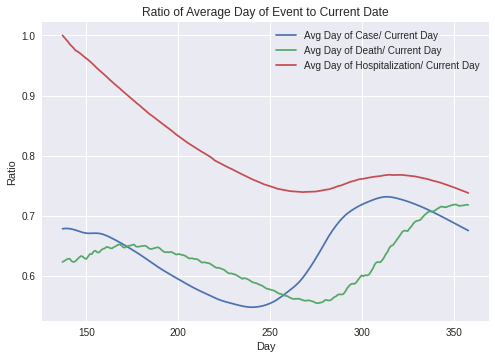

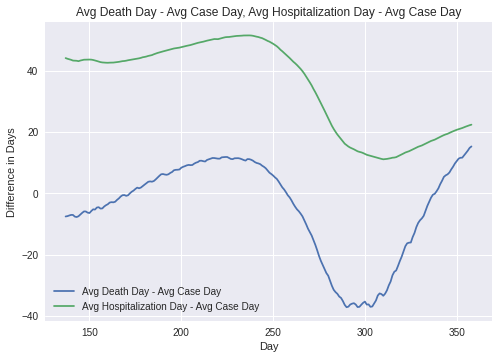

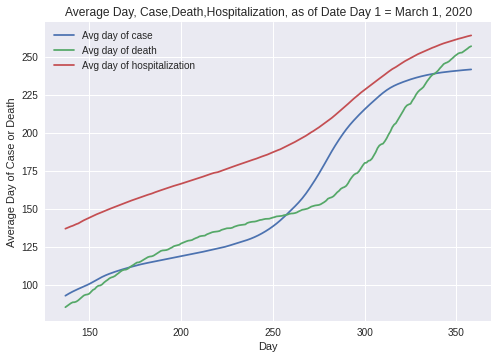

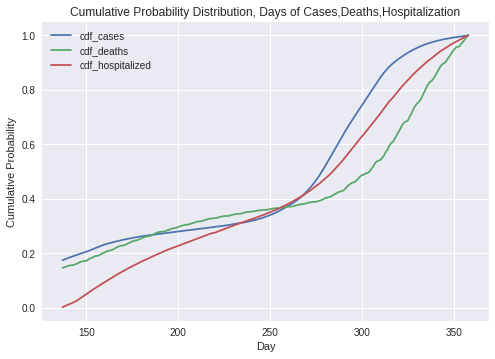

In [93]:
# ratio avg Day of Event/current Date Graph
df.plot(x= 'Day',y = ['Avg Day of Case/ Current Day','Avg Day of Death/ Current Day','Avg Day of Hospitalization/ Current Day'],title = 'Ratio of Average Day of Event to Current Date', ylabel = 'Ratio')
# avg hospitalization day - avg case day
df.plot(x = 'Day', y=['Avg Death Day - Avg Case Day','Avg Hospitalization Day - Avg Case Day'],title = 'Avg Death Day - Avg Case Day, Avg Hospitalization Day - Avg Case Day',ylabel = 'Difference in Days')
# avg Day of Case/Death/Hospitalization
df.plot(x = 'Day', y= ['Avg day of case','Avg day of death','Avg day of hospitalization'],title = 'Average Day, Case,Death,Hospitalization, as of Date Day 1 = March 1, 2020', ylabel = 'Average Day of Case or Death')
# CDF
df.plot( x= 'Day', y= ['cdf_cases','cdf_deaths','cdf_hospitalized'],title = 'Cumulative Probability Distribution, Days of Cases,Deaths,Hospitalization', ylabel = 'Cumulative Probability')

plt.style.use('seaborn')